# MNIST
---
- 학습용 : 60,000
- 테스트용 : 10,000
- 이미지 : 28*28
- 타겟 : 0 ~ 9 총 10개

28*28 => 입력 : 784, 출력 : 0일 확률, ..., 9일 확률

---

## 손글씨 숫자 식별 모델
---
- 데이터 : MNIST 데이터 사용
- 학습모델 : 신경망 모델
- 동작 : 0 ~ 9 숫자 판별

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split

In [50]:
#!pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable


In [47]:
#!pip install pydot

Defaulting to user installation because normal site-packages is not writeable


In [48]:
#!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable


In [51]:
#!pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable


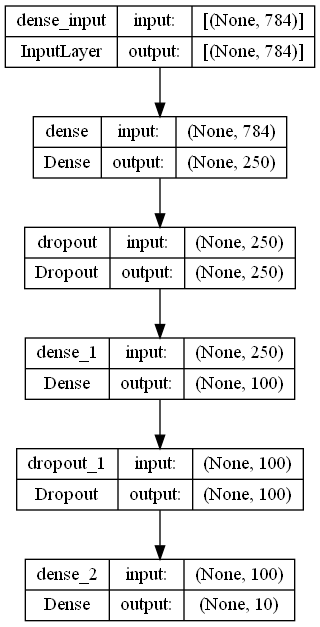

In [47]:
plot_model(model, show_shapes=True)

### [1] 데이터 로딩 및 준비

In [2]:
(x_train, y_train), (x_test, y_test)=load_data()

In [3]:
print(f'x_train.shape, x_test.shape : {x_train.shape}, {x_test.shape}')
print(f'y_train.shape, y_test.shape : {y_train.shape}, {y_test.shape}')

x_train.shape, x_test.shape : (60000, 28, 28), (10000, 28, 28)
y_train.shape, y_test.shape : (60000,), (10000,)


In [4]:
# 검증용 데이터 셋 준비
x_train, x_val, y_train, y_val=train_test_split(
x_train, y_train, stratify=y_train)

In [5]:
print(f'x_train.shape, x_val.shape : {x_train.shape}, {x_val.shape}')
print(f'y_train.shape, y_val.shape : {y_train.shape}, {y_val.shape}')

x_train.shape, x_val.shape : (45000, 28, 28), (15000, 28, 28)
y_train.shape, y_val.shape : (45000,), (15000,)


### [2] 데이터 전처리
- 수치 데이터 => 스케일링
- 범주형 데이터 => 원핫인코딩

In [6]:
# 저장된 값 확인
x_train[0], y_train[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  11,  60,  69, 134,  43,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0

In [7]:
# 이미지 데이터의 픽셀값 즉 특성(Feature) 0.0 ~ 1.0으로 스케일링
x_train=x_train/255.0

In [8]:
x_val=x_val/255.0
x_test=x_test/255.0

In [9]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
# 타겟 라벨 => OneHotEncoding으로 변환
from sklearn.preprocessing import OneHotEncoder

In [11]:
encoder=OneHotEncoder()

In [12]:
encoder.fit(y_train.reshape(-1, 1))
y_train=encoder.transform(y_train.reshape(-1, 1))

In [13]:
type(y_train)

scipy.sparse.csr.csr_matrix

In [14]:
y_train=y_train.toarray()
type(y_train)

numpy.ndarray

In [15]:
print(f'type(y_train) : {type(y_train)}, y_tarin[0] : {y_train[0]}')

type(y_train) : <class 'numpy.ndarray'>, y_tarin[0] : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [16]:
y_test=encoder.transform(y_test.reshape(-1, 1))
y_val=encoder.transform(y_val.reshape(-1, 1))

In [17]:
y_test=y_test.toarray()
y_val=y_val.toarray()

In [18]:
x_train=x_train.reshape(-1, 28*28)

In [19]:
x_val=x_val.reshape(-1, 28*28)
x_val.shape

(15000, 784)

In [20]:
x_test=x_test.reshape(-1, 28*28)
x_test.shape

(10000, 784)

### [3] 모델 생성
---
- (1) 모델 구성
- (2) 모델 생성

#### [3-1] 모델 구성
---
- 입력 데이터 : 784 => 28*28 이미지 데이터
- 출력 데이터 : 10 => 0 ~ 9 숫자 라벨
- 학습 방법 : 분류 - 다중분류

In [21]:
model=Sequential(name='MNIST_NNModel')

In [22]:
# model.add(Flatten(input_shape=(784, ))) 하면 reshape 안 해도 됨
# Flatten이 첫 번째 층이 아니면 input_shape 안 해도 됨

In [23]:
# Layer 생성 => Node(퍼셉트론, 뉴런) 개수,  활성화 함수, [옵] input_shape(#param, )
model.add(Dense(250, activation='relu', input_shape=(784, )))

In [24]:
model.add(Dropout(0.3))

In [25]:
model.add(Dense(100, activation='relu'))

In [26]:
model.add(Dropout(0.3))

In [27]:
# 출력 Layer 생성 => Node(퍼셉트론, 뉴런) 개수, 활성화 함수
model.add(Dense(10, activation='softmax'))

In [28]:
model.summary()

Model: "MNIST_NNModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               196250    
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               25100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 222,360
Trainable params: 222,360
Non-trainable params: 0
_________________________________________________________________


#### [3-2] 모델 생성
---
- loss 함수 => crossentropy
    * 이진분류 : binary_crossentropy
    * 다중분류 : sparse_categorical_crossentropy, categorical_crossentropy(원핫인코딩 했을 때)
- optimizer 기법 => 'rmsprop'
- metrics 평가항목 => 'loss'

In [29]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics='accuracy')

### [4] 학습

In [30]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [31]:
stopCB=EarlyStopping(monitor='val_loss', patience=3)

In [32]:
MODEL_PATH='model.{epoch:02d}-{val_loss:.2f}.h5'
modelCB=ModelCheckpoint(filepath=MODEL_PATH,
                       save_best_only=True)

In [33]:
MODEL_PATH2='./model'
modelCB2=ModelCheckpoint(filepath=MODEL_PATH2)

In [34]:
MODEL_PATH3='./modelWeight'
modelCB3=ModelCheckpoint(filepath=MODEL_PATH3,
                         save_best_only=True,
                       save_weights_only=True)

In [35]:
his=model.fit(x_train, y_train, epochs=10,
             validation_data=(x_val, y_val),
             callbacks=[stopCB, modelCB])

Epoch 1/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3475 - accuracy: 0.8944 - val_loss: 0.1307 - val_accuracy: 0.9597
Epoch 2/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1663 - accuracy: 0.9509 - val_loss: 0.1042 - val_accuracy: 0.9675
Epoch 3/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1294 - accuracy: 0.9601 - val_loss: 0.0905 - val_accuracy: 0.9717
Epoch 4/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1126 - accuracy: 0.9649 - val_loss: 0.0846 - val_accuracy: 0.9741
Epoch 5/10
1407/1407 [==============================] - 5s 3ms/step - loss: 0.0968 - accuracy: 0.9704 - val_loss: 0.0835 - val_accuracy: 0.9743
Epoch 6/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0879 - accuracy: 0.9723 - val_loss: 0.0734 - val_accuracy: 0.9769
Epoch 7/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0784 - accuracy: 0.9757 - val_loss: 0.0738 - val_accuracy:

In [36]:
# 학습 진행 결과 시각화
import matplotlib.pyplot as plt

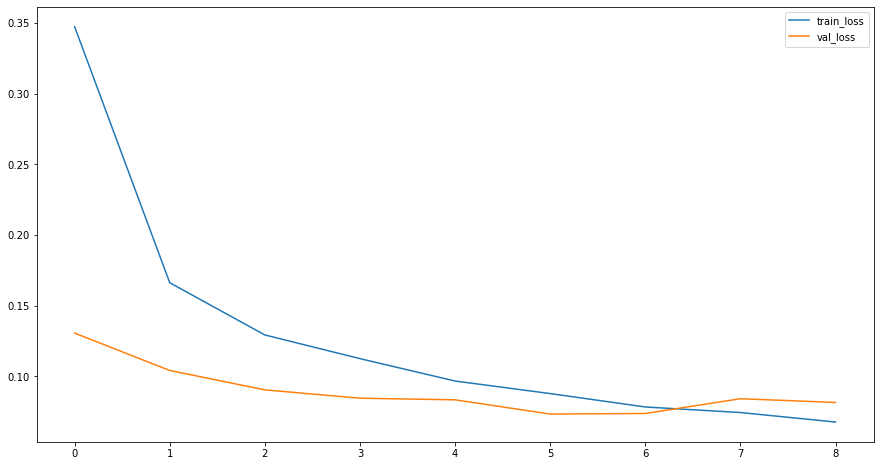

In [37]:
plt.figure(figsize=(15, 8))
plt.plot(his.epoch, his.history['loss'], label='train_loss')
plt.plot(his.epoch, his.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

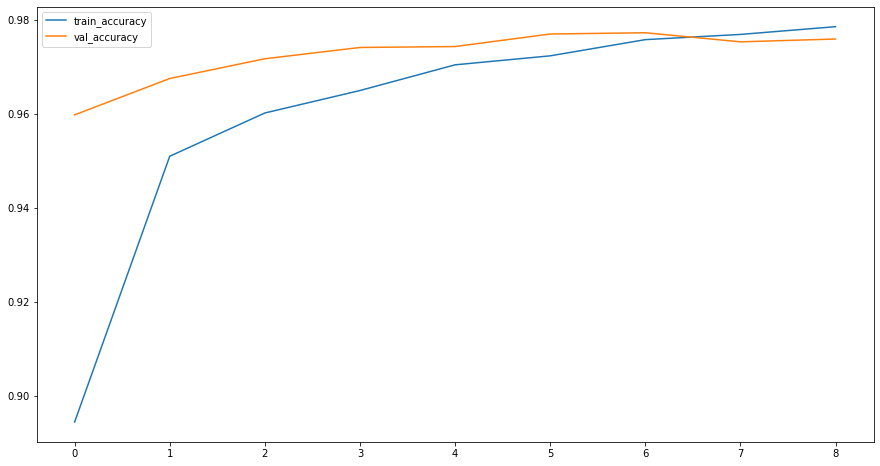

In [38]:
plt.figure(figsize=(15, 8))
plt.plot(his.epoch, his.history['accuracy'], label='train_accuracy')
plt.plot(his.epoch, his.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

### [5] 평가
---
- evaluate() 메서드
    * test data, target
    * 반환값 : loss, metrics에서 지정한 성능 평가 항목

In [39]:
test_result=model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0817 - accuracy: 0.9773


In [40]:
test_result

[0.08166719228029251, 0.9772999882698059]

In [41]:
x_test[0].shape

(784,)

### [6] 테스트/예측

In [42]:
model.predict(x_test[[0]])

1/1 [==============================] - 0s 101ms/step


array([[3.1747441e-11, 8.4317698e-08, 5.2385767e-06, 6.7039576e-07,
        1.7537050e-11, 1.5843264e-10, 8.1298588e-16, 9.9999356e-01,
        5.8634608e-13, 3.4822520e-07]], dtype=float32)

In [43]:
pre_label=model.predict(x_test[0].reshape(-1, 784))

1/1 [==============================] - 0s 14ms/step


In [44]:
import numpy as np
np.round(pre_label, 2)   # 예측값은 7

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [45]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])